In [ ]:
NAME: Akash Mishra
ROLL NO : 36
CLASS : BE IT (B2)
TITLE : :Build the Image classification model by dividing the model into following 4 stages:
            a. Loading and preprocessing the image data
            b. Defining the model’s architecture
            c. Training the model
            d. Estimating the model’s performance

In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D,Dense,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
print(x_train.shape)

(60000, 28, 28)


In [9]:
x_train[0].min(), x_train[0].max()

(0, 255)

In [11]:
x_train = (x_train - 0.0 ) / (255.0 - 0.0)
x_test = (x_test - 0.0)/(255.0 - 0.0)
x_train[0].min(), x_train[0].max()
(0.0, 1.0)

(0.0, 1.0)

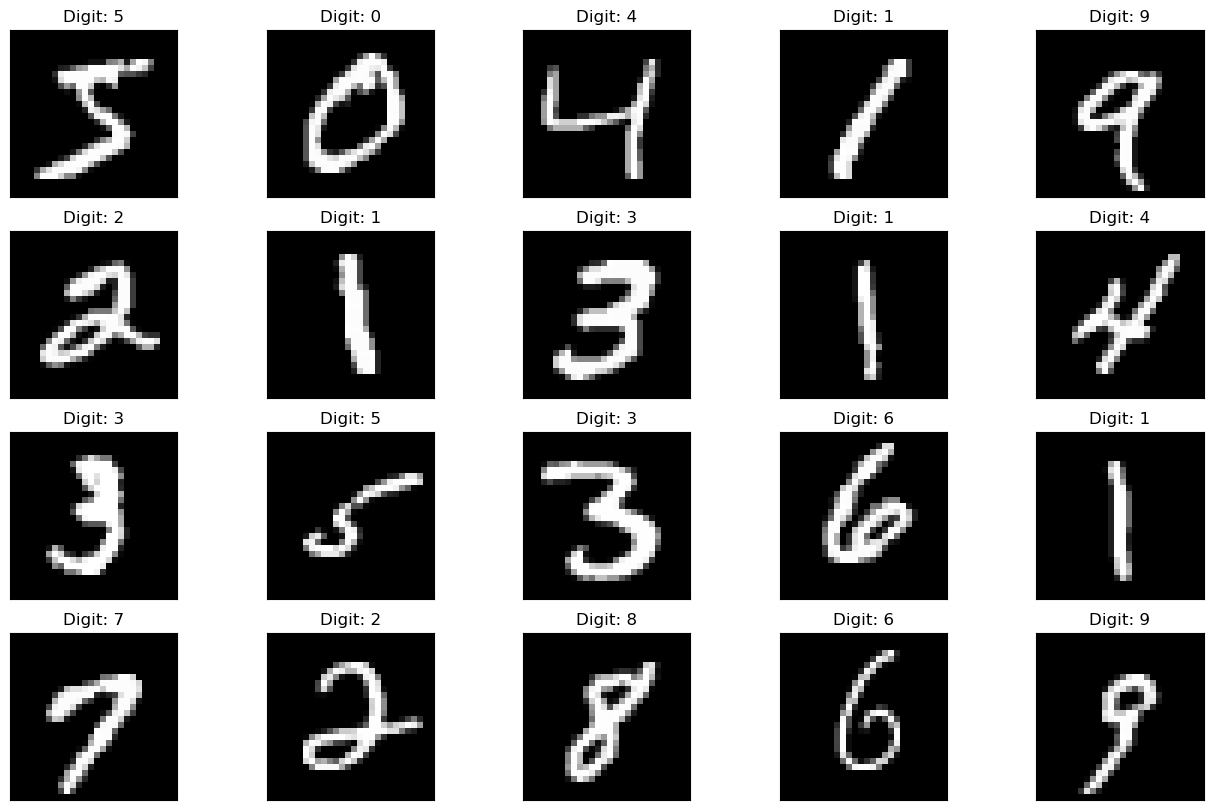

In [13]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4,5, i+1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])
plt.figure(figsize=(16,10))
for i in range(20):
    plot_digit(x_train[i], y_train[i], plt, i)
plt.show()

In [15]:
x_train = x_train.reshape((x_train.shape+ (1,)))
x_test = x_test.reshape((x_test.shape+ (1,)))

In [17]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [19]:
model = Sequential([
    Conv2D(32,(3,3), activation="relu", input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])

C:\Users\AKASH\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)

model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)               │ (None, 26, 26, 32)    │          320 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 13, 13, 32)    │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten (Flatten)             │ (None, 5408)          │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense (Dense)                 │ (None, 100)           │      540,900 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 10)            │        1,010 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.9108 - loss: 0.3069 - val_accuracy: 0.9587 - val_loss: 0.1383
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9681 - loss: 0.1047 - val_accuracy: 0.9747 - val_loss: 0.0799
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9808 - loss: 0.0658 - val_accuracy: 0.9813 - val_loss: 0.0583
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9847 - loss: 0.0501 - val_accuracy: 0.9830 - val_loss: 0.0525
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.9884 - loss: 0.0386 - val_accuracy: 0.9830 - val_loss: 0.0488


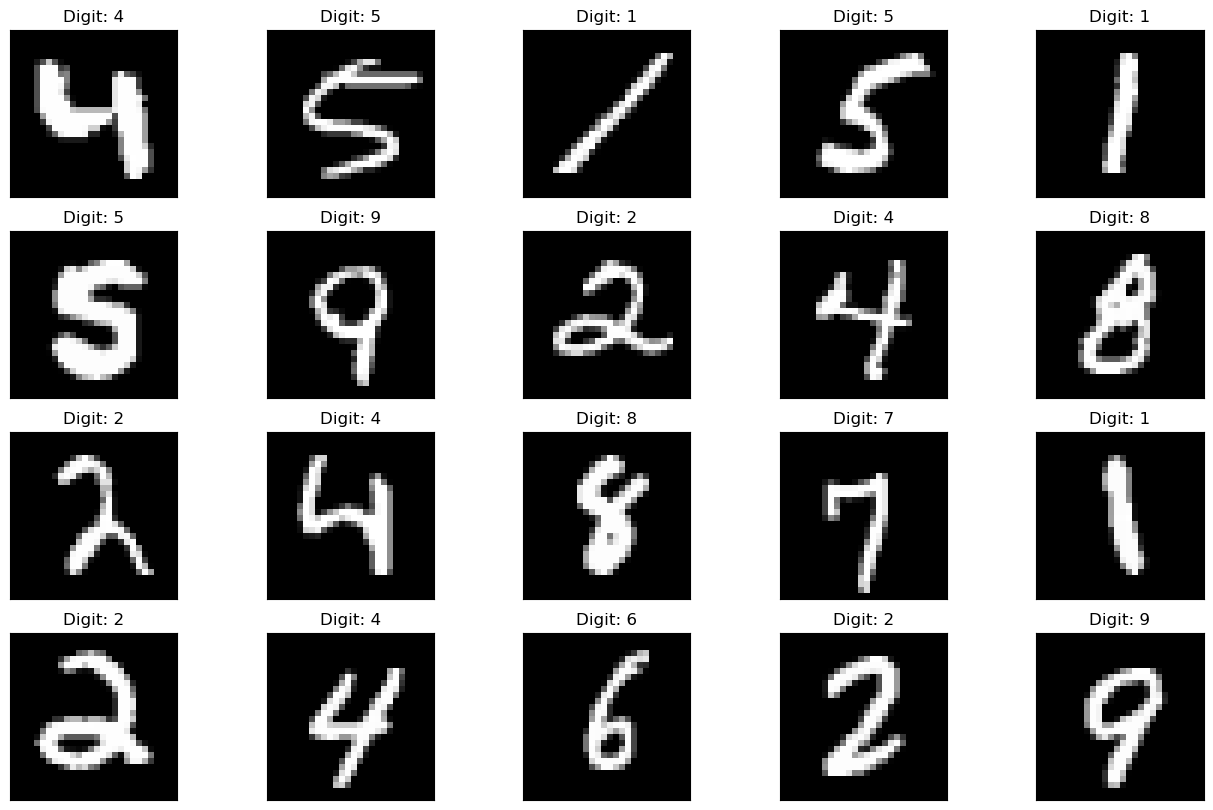

In [31]:
plt.figure(figsize=(16,10))
for i in range(20):
    image = random.choice(x_test).squeeze()
    prediction = model.predict(image.reshape(1, 28, 28, 1), verbose=0)
    digit = np.argmax(prediction, axis=1)[0]  # correct way
    plot_digit(image, digit, plt, i)
plt.show()


In [33]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9830 - loss: 0.0488
Loss:  0.04875865951180458
Accuracy:  0.9829999804496765


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Actual Number:  0
Predicted Number:  3


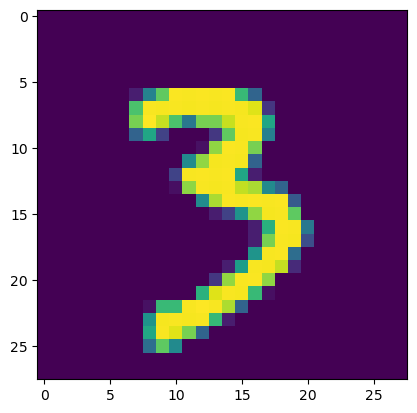

In [35]:
n = 30 
plt.imshow(x_test[n])
predicted_value = model.predict(x_test)
print("Actual Number: ",np.argmax(y_test[n]))
print("Predicted Number: ", np.argmax(predicted_value[n]))